# FAKE INSTAGRAM ACOUNT DETECTOR

**UNDERSTANDING THE PROBLEM**
- This project aim is to build and train a deep neural network model to detect fake or spam instagram accounts.

- These days spam accounts have become a major problem in in all the social media platforms.

- Many users are creating fake accounts to create an illusion of having many followers to thier personal accounts.

- Fake accounts are being created to sell fake products and services.

- They are also being used to impersonate other account users from common people to celebrities in order to influence, criticize, hurt feelings and reputation.


- There are few key input features which we considered to determine if the account is fake or not.

**THE INPUT FEATURES ARE:**

- PROFILE PICTURE - The user has profile picture or not.
- NUMS/LENGTH USERNAME - The ratio of number of numerical chars in username to its length.
- FULLNAME WORDS - Full name in word tokens
- NAME/LENGTH OF FULL NAME - The ratio of number of numerical characters in full name to its length.
- NAME == USERNAME - Are username and full name literally the same?
- DESCRIPTION LENGTH - Bio length in characters.
- EXTERNAL URL - Has external URL or not.
- PRIVATE - Private or not.
- POSTS - Number of posts.
- FOLLOWERS - Number of followers.
- FOLLOWS - Number of follows.

**TRAINED DETECTOR MODEL:**
This model is trained such that it considers the above given features and determines whether a particular account is fake or not. By resulting the output as either 0 or 1 meaning TRUSTED or FAKE respectively. Our intention is to make this software capable of thinking like a human, based on the data it is given and results in maximum probability of success.

In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
     


     

In [2]:
#Load the training and testing datasets
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [3]:
instagram_df_train.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
instagram_df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


# EDA

In [5]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
instagram_df_train.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [7]:
#Check if null values 
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [9]:
# check duplicate records 

instagram_df_train.duplicated().sum()

2

In [10]:
#Number of unique values in the profile pic column
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [11]:
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [12]:
instagram_df_train['external URL'].value_counts()


external URL
0    509
1     67
Name: count, dtype: int64

In [13]:
(instagram_df_train['description length'] > 50).sum()


98

In [14]:

instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [15]:
instagram_df_test.describe()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [16]:
instagram_df_test.isnull().sum()


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [17]:
instagram_df_test['fake'].value_counts()


fake
0    60
1    60
Name: count, dtype: int64

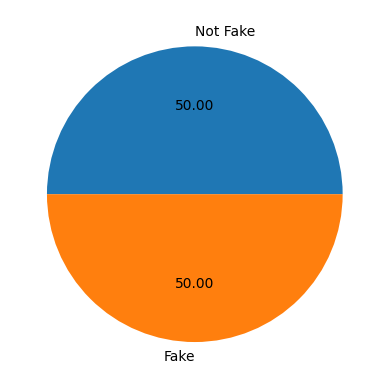

In [22]:
plt.pie(instagram_df_train['fake'].value_counts() , labels={'Not Fake' , 'Fake' } , autopct="%.2f")
plt.show()

C:\Users\brije\AppData\Local\Temp\ipykernel_12376\3021226986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(instagram_df_train['private'],palette = "PuBu")


<Axes: ylabel='count'>

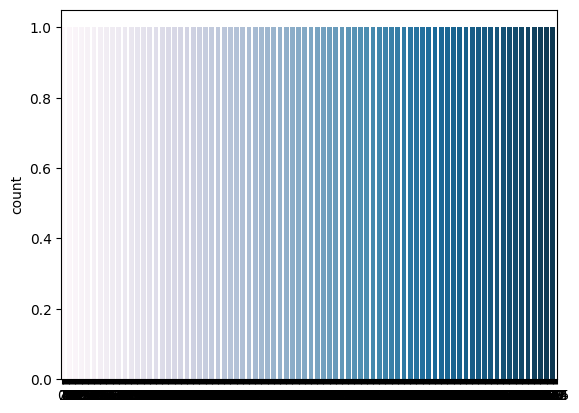

In [26]:
sns.countplot(instagram_df_train['private'],palette = "PuBu")


C:\Users\brije\AppData\Local\Temp\ipykernel_12376\2810340997.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'],kde=True)


<Axes: xlabel='nums/length username', ylabel='Density'>

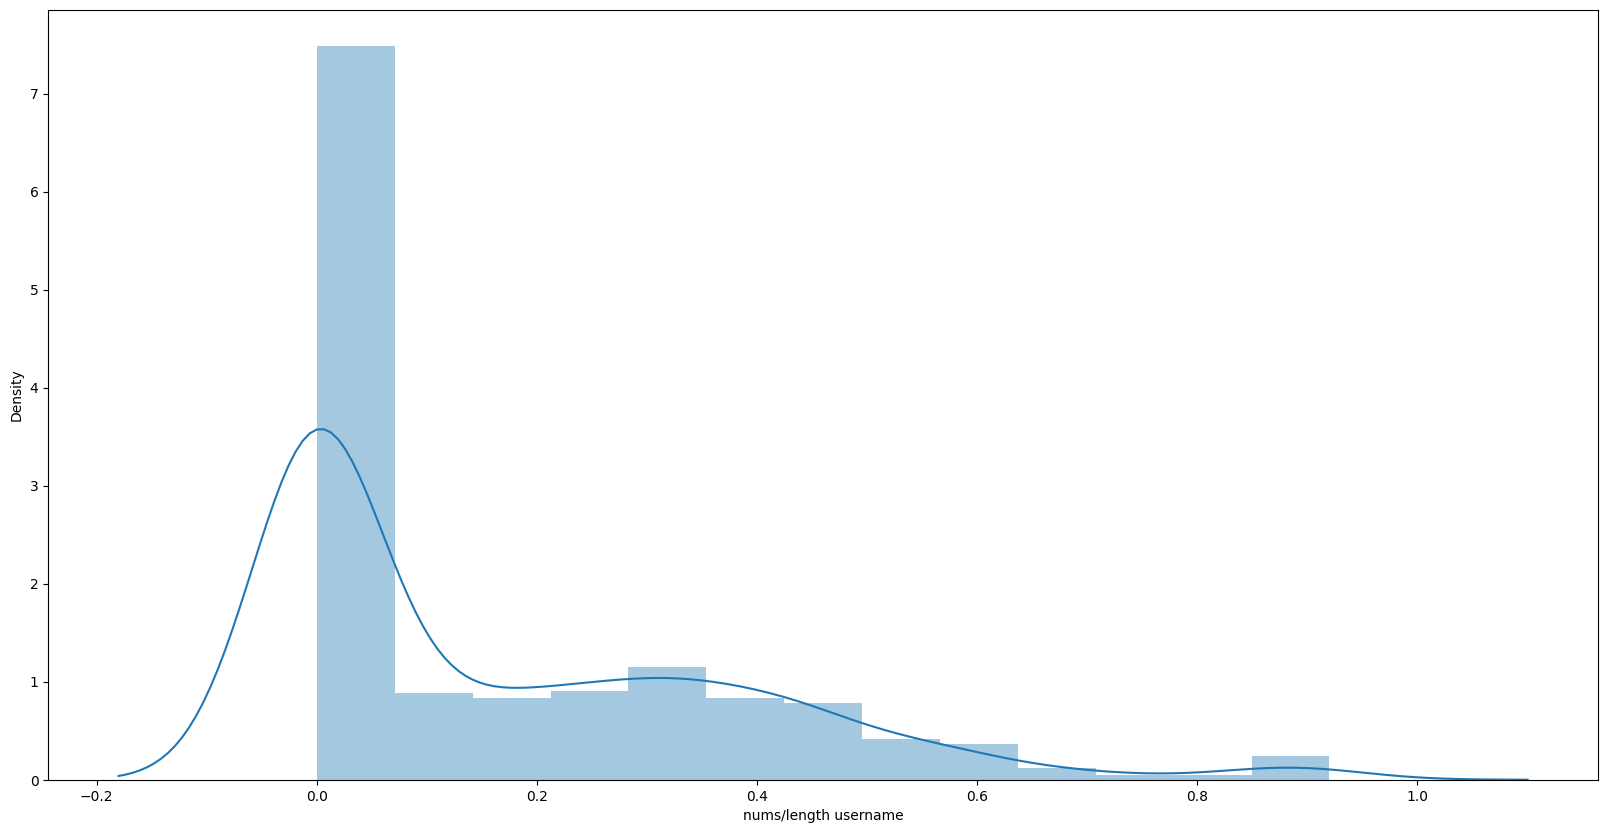

In [27]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'],kde=True)

<Axes: >

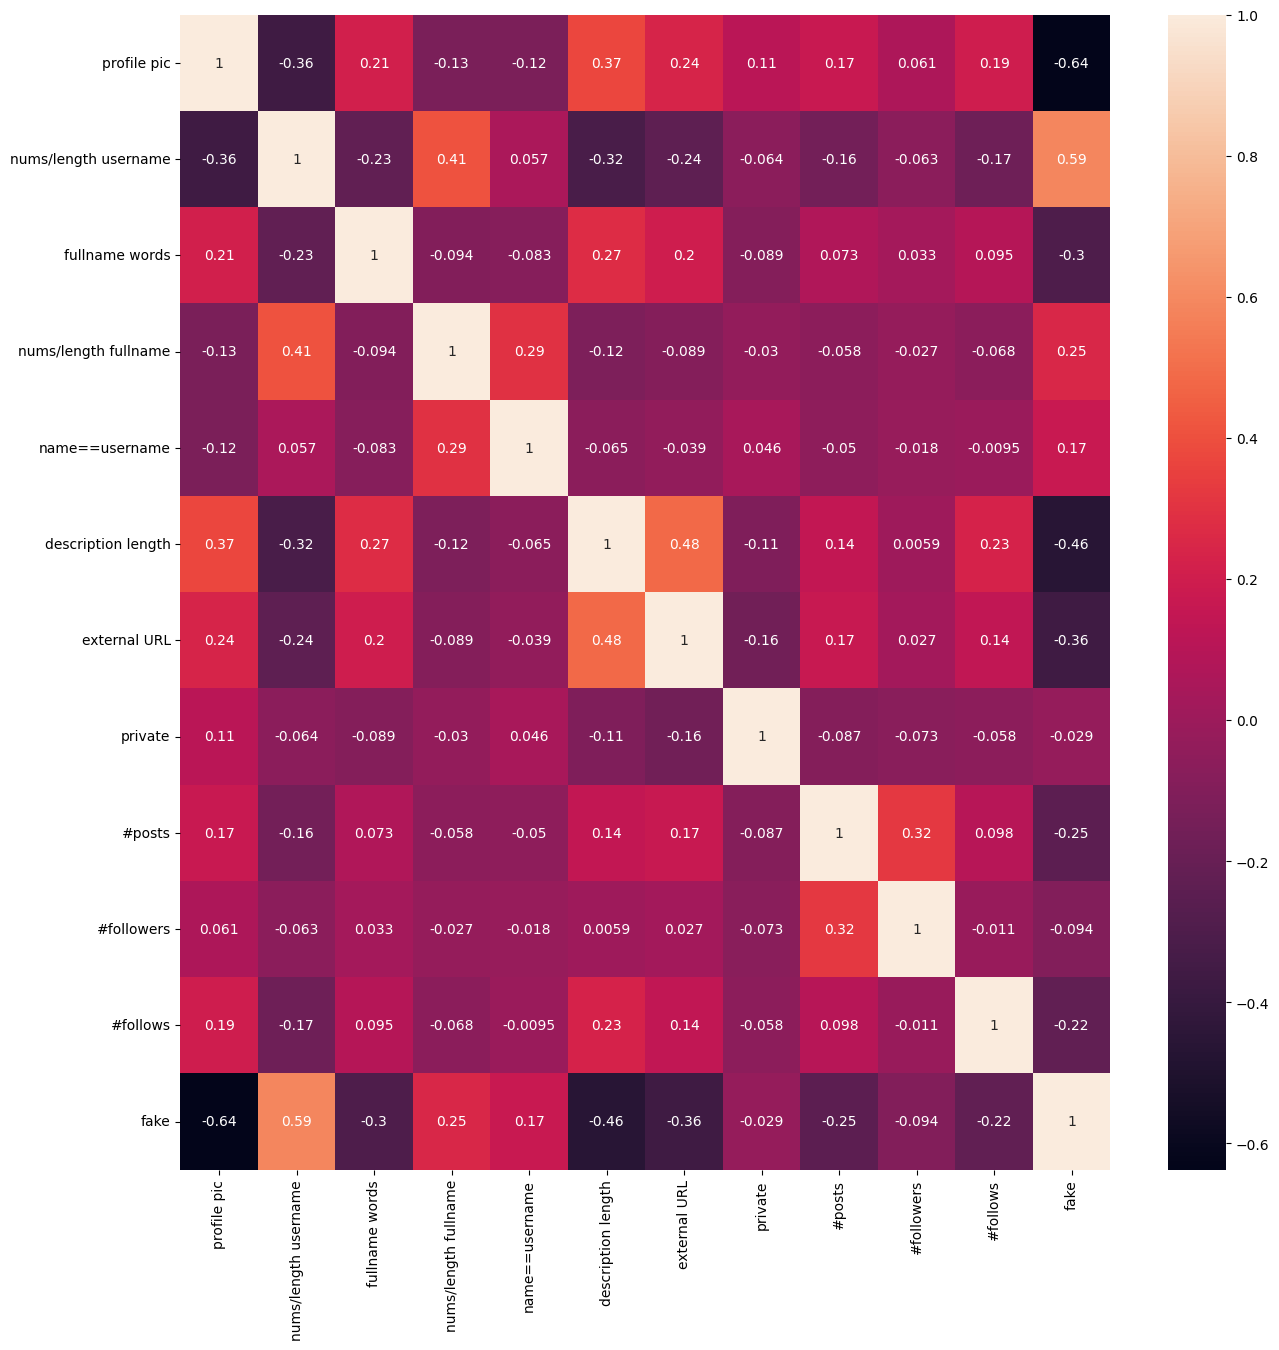

In [28]:
#Correlation heatmap
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

# Split data 


In [30]:
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [31]:
x_test


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [32]:
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [33]:
# Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)
     

In [34]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [35]:
X_train.shape,X_test.shape


((576, 11), (120, 11))

In [36]:
Y_train.shape,Y_test.shape


((576, 2), (120, 2))

In [37]:

#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage

82.75862068965517

In [38]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage

17.24137931034483

# Model Building 

In [40]:
#Building the main model 

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()


c:\Users\brije\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,077 (47.18 KB)

 Trainable params: 12,077 (47.18 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [42]:
history = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6089 - loss: 0.6549 - val_accuracy: 0.7241 - val_loss: 0.5802
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7938 - loss: 0.5016 - val_accuracy: 0.8103 - val_loss: 0.4281
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8664 - loss: 0.3716 - val_accuracy: 0.8448 - val_loss: 0.3255
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8845 - loss: 0.2954 - val_accuracy: 0.8621 - val_loss: 0.2527
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9087 - loss: 0.2696 - val_accuracy: 0.8621 - val_loss: 0.2652
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8960 - loss: 0.2907 - val_accuracy: 0.8448 - val_loss: 0.2652
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.3155 - val_accuracy: 0.8793 - val_loss: 0.2420
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8819 - loss: 0.2970 - val_accuracy: 0.8621 - val_loss

In [43]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


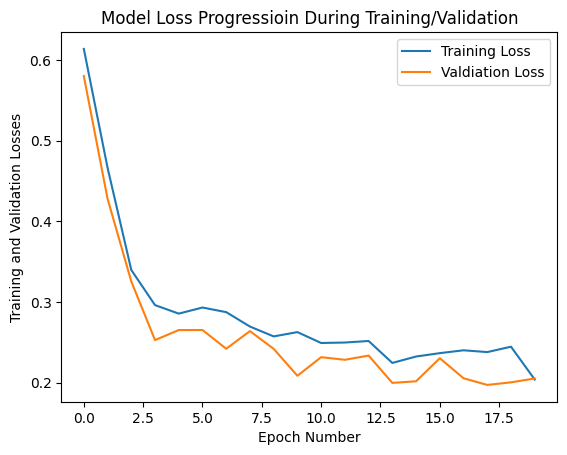

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [45]:
predicted = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [46]:

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [47]:

print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



<Axes: >

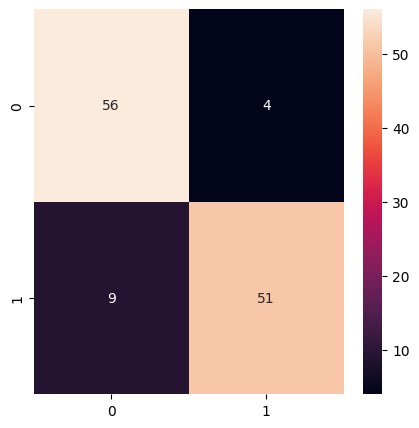

In [55]:


plt.figure(figsize=(5, 5))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

In [52]:
model.save('Fake_account_detector.h5')

# CONCLUSION:
Thus, we have analyzed the dataset and obtained a fairly accurate predictive model using Neural networks.

The model is hence trained to detect fake accounts in instagram based on the considered features.

The fake account detection model demonstrates strong performance across key evaluation metrics. With an overall accuracy of 89.17%, precision of 93.33%, and a solid F1 score of 89.6%, the model excels in correctly identifying fake accounts while maintaining low false positive rates. The high specificity of 92.73% indicates reliable detection of real accounts, and a recall of 86.15% shows it successfully captures the majority of fraudulent ones.


The model predicted true values for 107 accounts and predicted false values for 13 accounts out of 120 accounts.